<a href="https://colab.research.google.com/github/GerardoLopezO/IB_IA_2023/blob/main/A3_Training_an_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gerardo Francisco Lopez Oseguera**

Student ID: **1143867**

Class: 001 E2023 Inteligencia Artificial 

Day: **Tuesday N4 a N6**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 84s 43ms/step - loss: 0.1406 - accuracy: 0.9576 - val_loss: 0.0517 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0302 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 68s

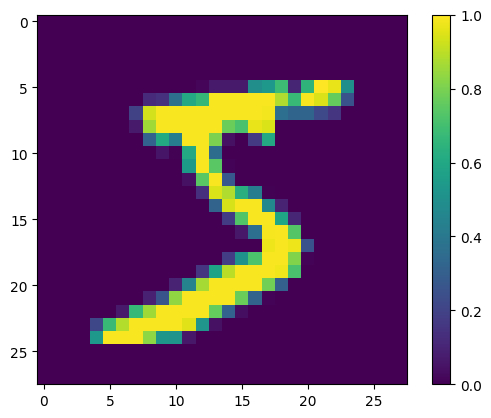

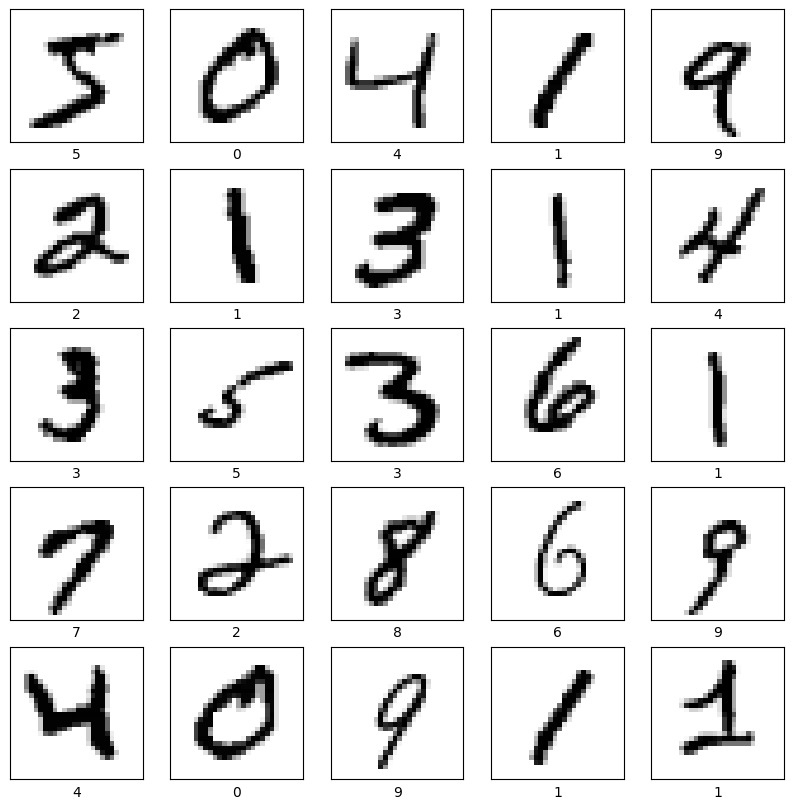

313/313 [==============================] - 3s 10ms/step


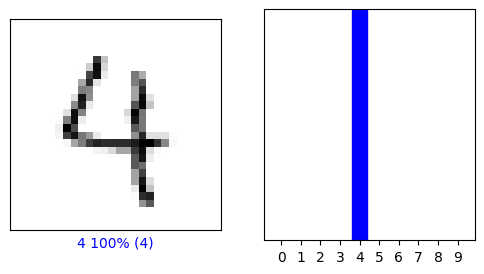

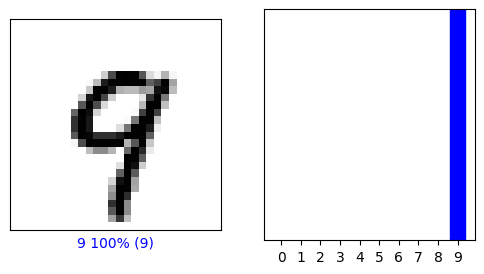

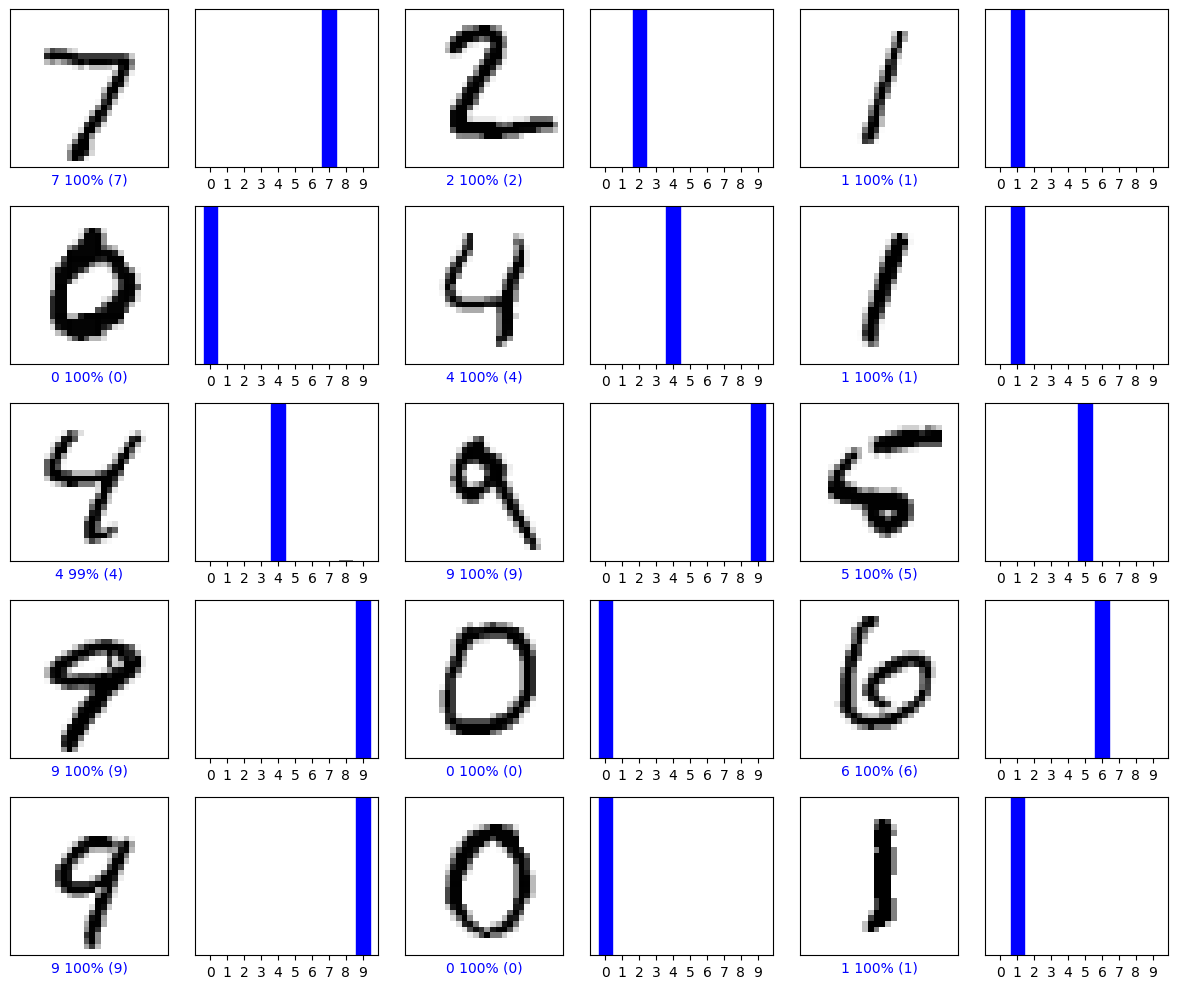

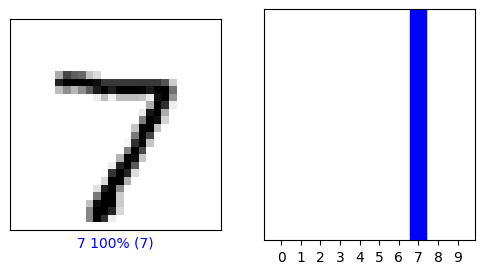

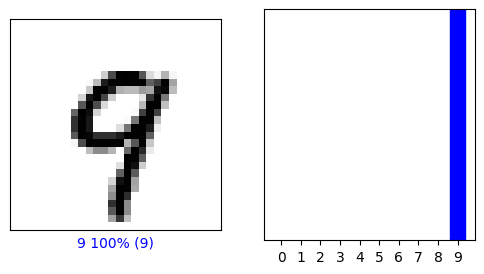

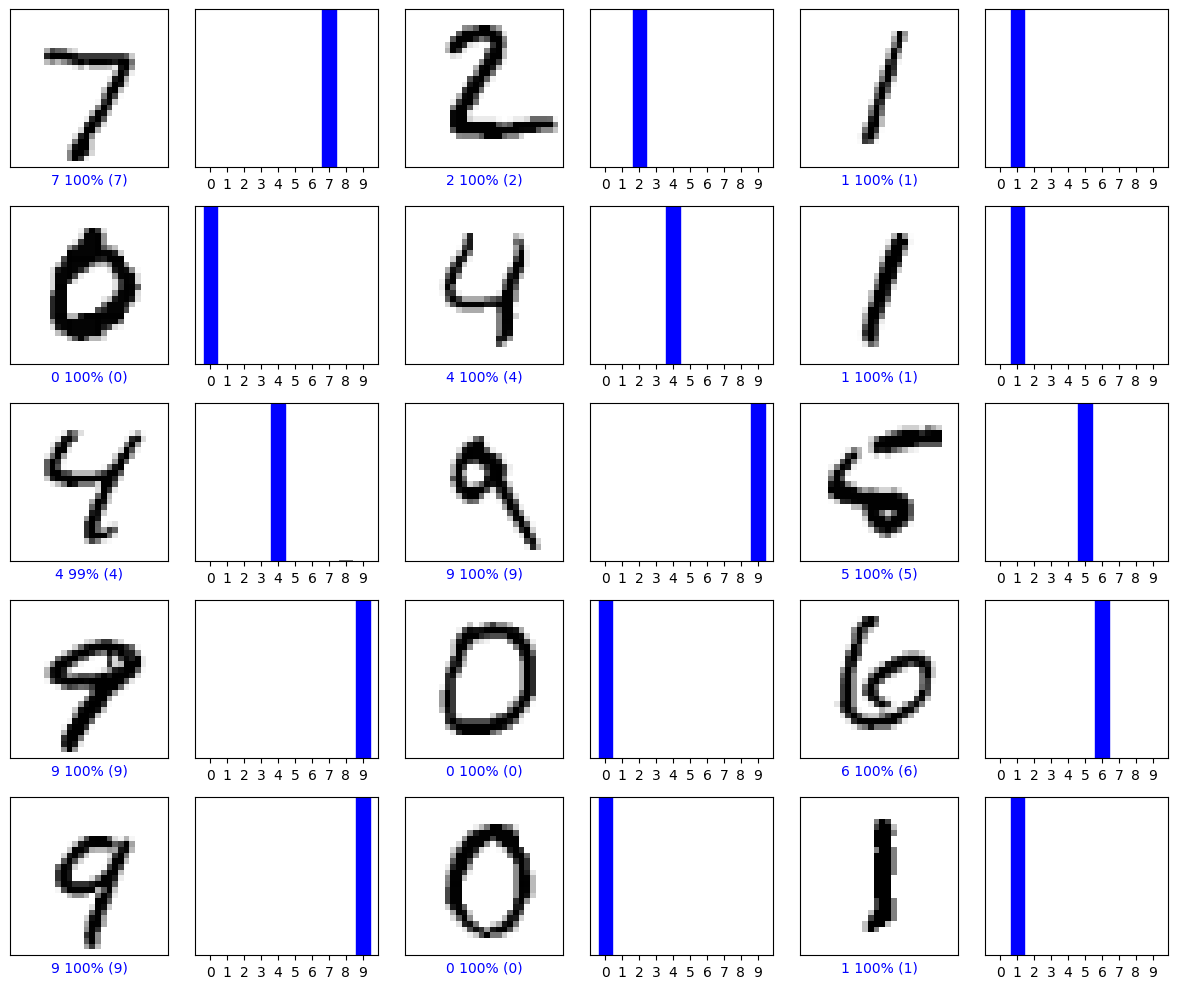

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 27ms/step
[[2.2914537e-13 1.3787379e-12 1.0000000e+00 6.6287832e-17 5.1245324e-18
  6.2490454e-21 2.1137241e-11 1.5158625e-16 1.0675321e-15 3.6116673e-20]]


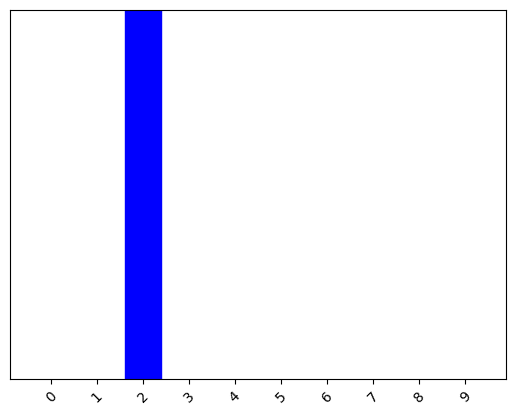

In [1]:
# Import of libraries and data loading:

# The required libraries are imported, including TensorFlow and its corresponding submodules, 
#as well as the numpy and matplotlib helper libraries.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#The Keras MNIST dataset is imported using keras.datasets.mnist.
#Load and split the dataset into training (train_images and train_labels) and test (test_images and test_labels) sets.
handw_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = handw_mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

#Definition of the neural network model:

#The model includes convolutional layers (Conv2D) and clustering layers (MaxPooling2D) to extract relevant features from the images.
#The activation function 'relu' is used in the convolutional layers.
#A flattening layer (Flatten) is used to convert the features into a 1D vector.
#Dense layers (Dense) with 'relu' and 'softmax' activation are added for final classification.
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


#Model compilation and training:

#We copile the model using the optimizer "adam", 
#the loss function "sparse_categorical_crossentropy" and specify that we want to track precision ("accuracy") as a metric.
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#training the model using the training data set (train_images and train_labels) for a specified number of epochs
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

#Evaluation of the model in the test set:

#The performance of the model on the test set is evaluated using the evaluate() method.
The test loss (test_loss) and test accuracy (test_acc) are calculated and displayed.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

#Display of images and results:

#Some example images of the training set are displayed using plt.imshow() and plt.show().
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Predictions are made on the test set using the predict() method.
#The result of the predictions for a particular image (predictions[0]), 
#the index of the predicted class (np.argmax(predictions[0])) 
#and the corresponding true label (test_labels[0]) are displayed.
predictions = model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

#Helper functions (plot_image and plot_value_array) are defined to display the images 
#along with their labels and prediction values.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


predictions_single = model.predict(img)

print(predictions_single)


plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)